In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
headcount_data=pd.read_csv("headcount_data.csv")

In [2]:
headcount_data.head()

,Avg_Exp,count_emp,Year
0,10.0,94,2014
1,11.0,97,2016
2,11.5,50,2013
3,11.7,53,2013
4,11.9,53,2017


In [3]:
headcount_data.describe()

,Avg_Exp,count_emp,Year
count,367.000000,367.000000,367.000000
mean,31.900545,74.049046,2014.485014
std,10.780513,14.416437,2.814709
min,10.000000,50.000000,2010.000000
25%,22.850000,61.500000,2012.000000
50%,32.000000,74.000000,2014.000000
75%,41.150000,86.000000,2017.000000
max,50.300000,99.000000,2019.000000


In [5]:
headcount_data.isnull().sum()

Avg_Exp      0
count_emp    0
Year         0
dtype: int64

In [6]:
# Prepare the data
headcount_data['count_emp_lag1'] = headcount_data['count_emp'].shift(1)  # Lag-1 of employee count
headcount_data['AvgExp_lag1'] = headcount_data['Avg_Exp'].shift(1)  # Lag-1 for AvgExp
headcount_data.dropna(inplace=True)

In [9]:
headcount_data.head()

,Avg_Exp,count_emp,Year,count_emp_lag1,AvgExp_lag1
1,11.0,97,2016,94.0,10.0
2,11.5,50,2013,97.0,11.0
3,11.7,53,2013,50.0,11.5
4,11.9,53,2017,53.0,11.7
5,12.1,89,2018,53.0,11.9


In [11]:
# Features and target
X = headcount_data[['count_emp_lag1', 'AvgExp_lag1', 'Year']]
y = headcount_data['count_emp']


In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
model.intercept_

587.2474967834119

In [17]:
model.coef_

array([-0.0675335 ,  0.16847947, -0.2546715 ])

In [18]:
X = headcount_data[['count_emp_lag1', 'AvgExp_lag1', 'Year']]

## Head_pred = -0.06(count_emp_lag1)+0.168(AvgExp_lag1)-0.2546715 (Year)+587+212

In [19]:

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [20]:

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')

Train MSE: 212.8808
Test MSE: 178.1756


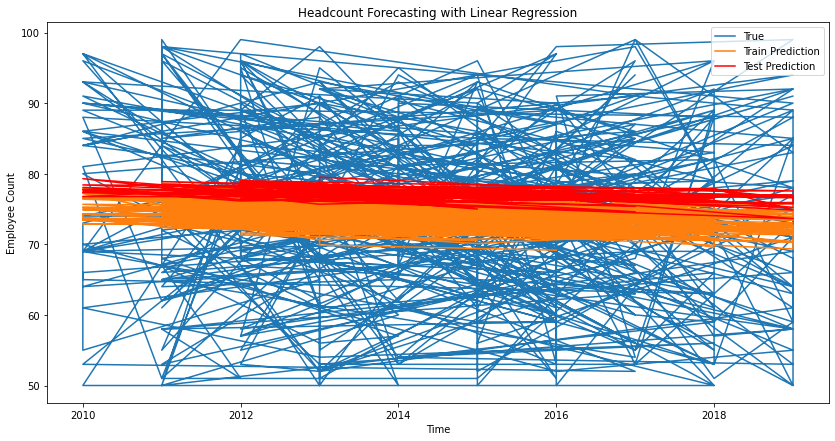


Actual and Forecasted Values:
     Actual  Forecasted
293      79   76.418850
294      99   75.484546
295      83   73.641381
296      68   76.521465
297      67   77.041972
..      ...         ...
362      64   75.242928
363      72   77.914728
364      78   78.155322
365      70   78.021641
366      68   78.578757

[74 rows x 2 columns]


In [23]:

# Create a table of actual and forecasted values
forecast_table = pd.DataFrame({'Actual': y_test, 'Forecasted': y_pred_test})

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(headcount_data['Year'], headcount_data['count_emp'], label='True')
plt.plot(X_train['Year'], y_pred_train, label='Train Prediction')
plt.plot(X_test['Year'], y_pred_test, label='Test Prediction', color='r')
plt.title('Headcount Forecasting with Linear Regression')
plt.xlabel('Time')
plt.ylabel('Employee Count')
plt.legend()
plt.show()

# Print actual and forecasted values table
print("\nActual and Forecasted Values:")
print(forecast_table)
